## Multi-Layer Perceptron for Digit Classification

### Prepare Data

In [1]:
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

# Import dependencies
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

# Load data
train_data = pd.read_csv('Datasets/mnist_train.csv')
test_data = pd.read_csv('Datasets/mnist_test.csv')

X_train = train_data.iloc[:,1:].values.astype('float32')
y_train = train_data.iloc[:,0].values
X_test = test_data.iloc[:,1:].values.astype('float32')
y_test = test_data.iloc[:,0].values

In [2]:
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

In [3]:
y_train_OneHot = np_utils.to_categorical(y_train)
y_test_OneHot = np_utils.to_categorical(y_test)

### Build Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


### Train Model

In [6]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=X_train_normalized,
                          y=y_train_OneHot, validation_split=0.2, 
                          epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 2s - loss: 0.4352 - accuracy: 0.8862 - val_loss: 0.2153 - val_accuracy: 0.9418
Epoch 2/10
240/240 - 1s - loss: 0.1900 - accuracy: 0.9455 - val_loss: 0.1617 - val_accuracy: 0.9561
Epoch 3/10
240/240 - 1s - loss: 0.1339 - accuracy: 0.9617 - val_loss: 0.1282 - val_accuracy: 0.9628
Epoch 4/10
240/240 - 1s - loss: 0.1032 - accuracy: 0.9710 - val_loss: 0.1100 - val_accuracy: 0.9674
Epoch 5/10
240/240 - 1s - loss: 0.0816 - accuracy: 0.9766 - val_loss: 0.0986 - val_accuracy: 0.9721
Epoch 6/10
240/240 - 1s - loss: 0.0658 - accuracy: 0.9814 - val_loss: 0.0923 - val_accuracy: 0.9724
Epoch 7/10
240/240 - 1s - loss: 0.0549 - accuracy: 0.9844 - val_loss: 0.0869 - val_accuracy: 0.9752
Epoch 8/10
240/240 - 1s - loss: 0.0462 - accuracy: 0.9873 - val_loss: 0.0831 - val_accuracy: 0.9751
Epoch 9/10
240/240 - 1s - loss: 0.0386 - accuracy: 0.9901 - val_loss: 0.0841 - val_accuracy: 0.9746
Epoch 10/10
240/240 - 1s - loss: 0.0316 - accuracy: 0.9915 - val_loss: 0.0787 - val_accuracy: 0.9768

### Visualize Training Process

In [7]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

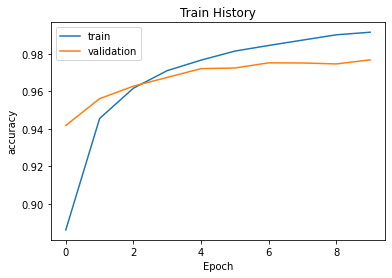

In [8]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

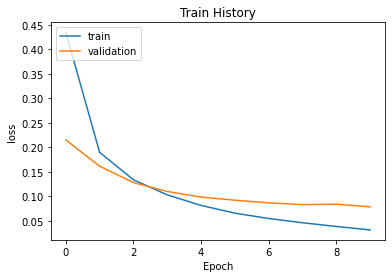

In [9]:
show_train_history(train_history,'loss','val_loss')

### Check Accuracy

In [10]:
scores = model.evaluate(X_test_normalized, y_test_OneHot)
print()
print('accuracy=', scores[1])

313/313 [==============================] - 0s 993us/step - loss: 0.0697 - accuracy: 0.9796

accuracy= 0.9796000123023987


### Prediction

In [11]:
prediction = model.predict_classes(X_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [12]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, prediction,
                                  idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [13]:
X_test_image = X_test.reshape(len(X_test), 28, 28)

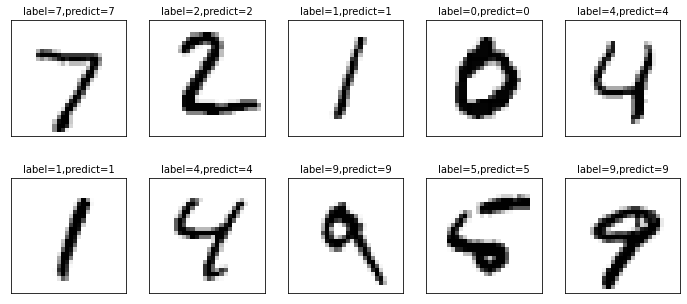

In [14]:
plot_images_labels_prediction(X_test_image, y_test,
                              prediction, idx=0)